In [96]:
#import libraries
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l1, l2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

In [97]:
#load the data
data = pd.read_csv('/home/christine/Downloads/Hotel review analysis/La_Veranda_Reviews-2023-01-16.csv')

In [98]:
#read the data
data.head()

,Title,PositiveReview,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse
0,Wonderful place to stay.,"New, comfortable apartments, close to the airp...",Nothing at all.,10.0,Olga,Norway,Budget Twin Room,1 night,June 2022,Solo traveler,NaN
1,It was superb,We had a really pleasant stay! The staff was v...,NaN,10.0,Iwona,Poland,Double Room,3 nights,December 2022,Family,NaN
2,Very Good,the location is great and near the airport. bu...,NaN,8.0,Ruijia,Sweden,Double Room,1 night,December 2022,Solo traveler,NaN
3,Wonderful,Great stuff\nGreat Quality/price\nClean,NaN,9.0,Theprincem,United Kingdom,Double Room with Balcony,2 nights,September 2022,Solo traveler,NaN
4,"Fantastic value for a new, modern and spotless...","Clean and modern with very comfortable beds, i...",NaN,10.0,M,Switzerland,Family Suite with Balcony,1 night,October 2022,Family,NaN


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             1521 non-null   object 
 1   PositiveReview    775 non-null    object 
 2   NegativeReview    435 non-null    object 
 3   Score             1523 non-null   float64
 4   GuestName         1523 non-null   object 
 5   GuestCountry      1523 non-null   object 
 6   RoomType          1460 non-null   object 
 7   NumberOfNights    1523 non-null   object 
 8   VisitDate         1523 non-null   object 
 9   GroupType         1523 non-null   object 
 10  PropertyResponse  123 non-null    object 
dtypes: float64(1), object(10)
memory usage: 131.0+ KB


In [100]:
data.describe()

,Score
count,1523.000000
mean,8.973802
std,1.300178
min,1.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,10.000000


In [101]:
#check for missing values
data.isnull().sum()

Title                  2
PositiveReview       748
NegativeReview      1088
Score                  0
GuestName              0
GuestCountry           0
RoomType              63
NumberOfNights         0
VisitDate              0
GroupType              0
PropertyResponse    1400
dtype: int64

In [102]:
#confirm if its missing
data.nunique()

Title                455
PositiveReview       768
NegativeReview       378
Score                 12
GuestName           1055
GuestCountry          68
RoomType               7
NumberOfNights        15
VisitDate             20
GroupType              4
PropertyResponse     117
dtype: int64

## Score Distribution

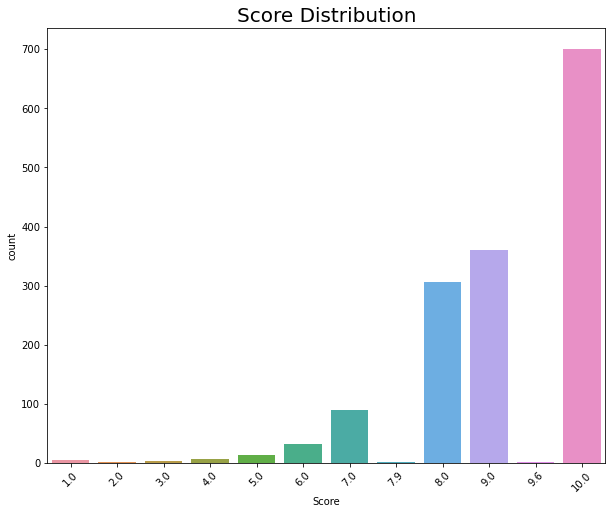

In [103]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x='Score')
plt.xticks(rotation=45)
plt.title('Score Distribution',fontsize=20)
plt.show()


$ Inference $ 
The highest score is ```10``` which is the best

In [104]:
data.Score.value_counts()

10.0    701
9.0     361
8.0     307
7.0      89
6.0      32
5.0      13
4.0       6
1.0       5
3.0       4
9.6       2
2.0       2
7.9       1
Name: Score, dtype: int64

## Number of Nights Distribution

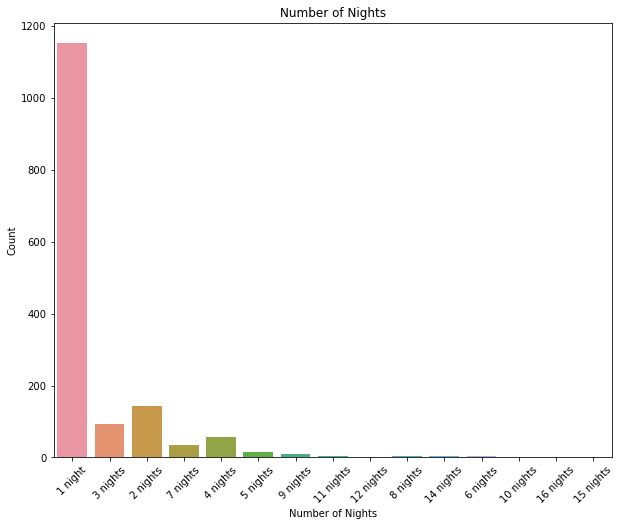

In [105]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x='NumberOfNights')
plt.title('Number of Nights')
plt.xlabel('Number of Nights')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

$ Inference $ 
Most people spend one night at the hotel

## Room Type Distribution

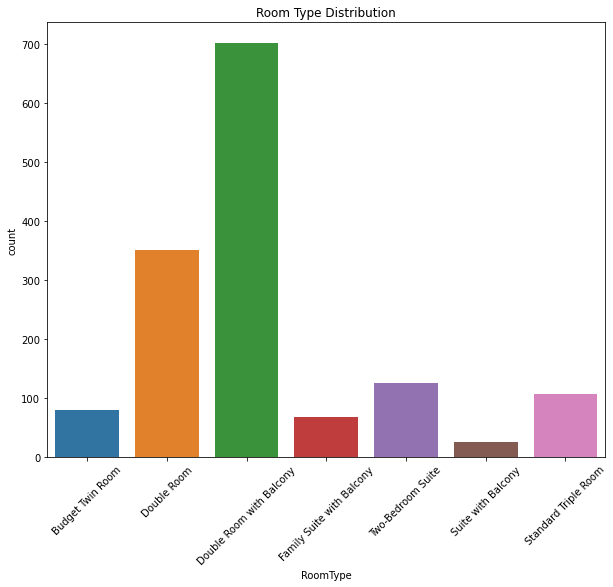

In [106]:
plt.figure(figsize = (10,8))
sns.countplot(data=data,x='RoomType')
plt.title('Room Type Distribution')
plt.xticks(rotation=45)
plt.show()

$ Inference $
Double room with balcony seems to be the highly booked

## Group Type Distribution

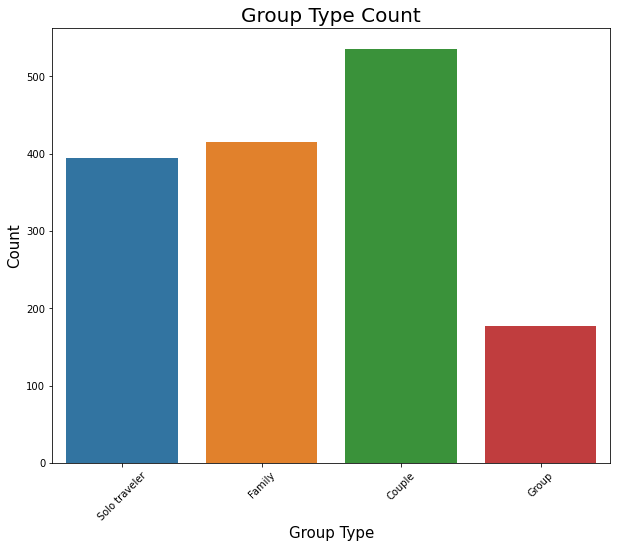

In [107]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x='GroupType')
plt.xlabel('Group Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Group Type Count',fontsize=20)
plt.xticks(rotation=45)
plt.show()

$ Inference $ 
Couples and families booked more than solo travelers and groups

## Visit Date Distribution

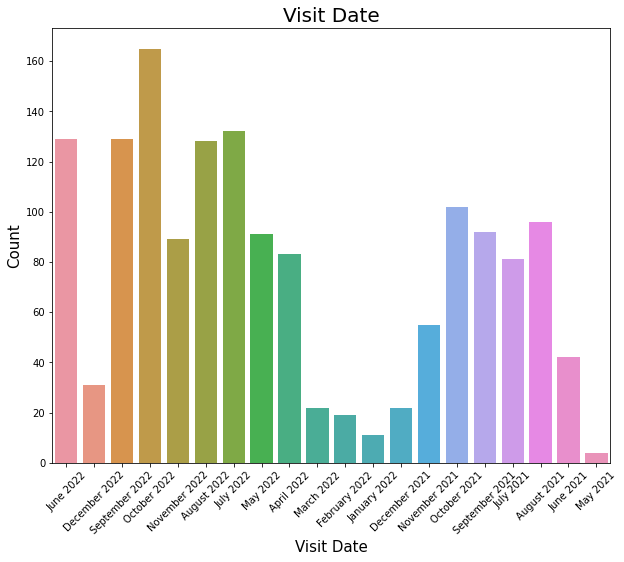

In [108]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x='VisitDate')
plt.xticks(rotation=45)
plt.title('Visit Date',fontsize=20)
plt.xlabel('Visit Date',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

$ Inference $ 
Months towards the end of the year highly book

## Rating based on Country

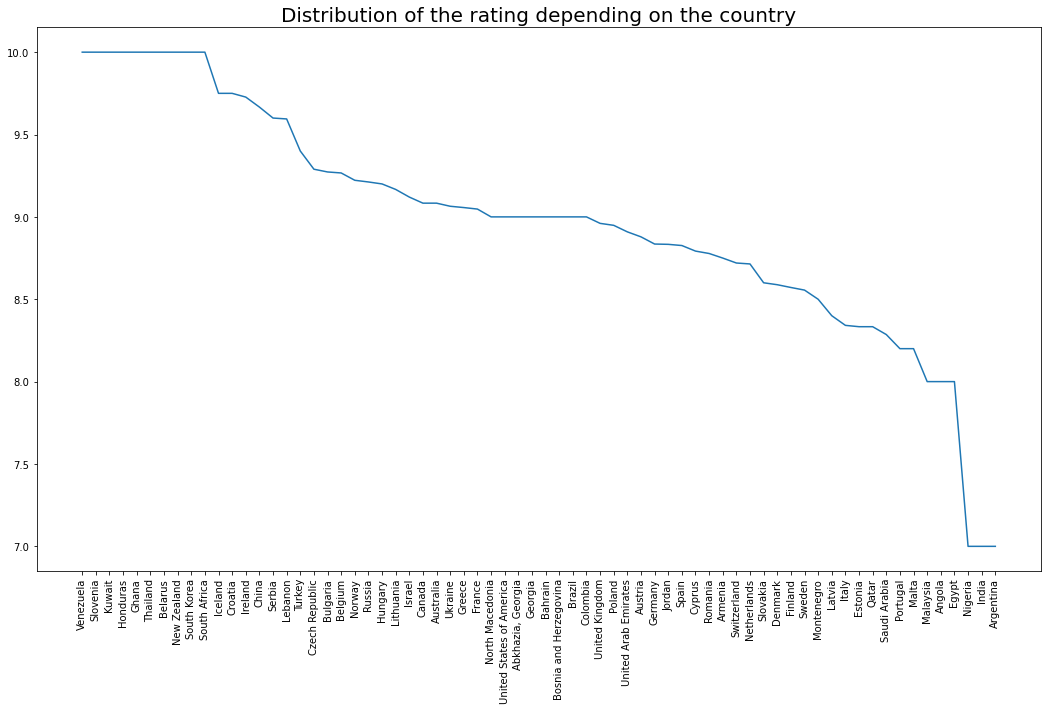

In [109]:
CS = data.groupby(['GuestCountry'])['Score'].mean().reset_index().sort_values(by='Score',ascending=False)
plt.figure(figsize=(18,10))
plt.xticks(rotation=90)
plt.plot(CS['GuestCountry'],CS['Score'])
plt.title('Distribution of the rating depending on the country',fontsize = 20)
plt.show()

## Number of nights depending on the Room Type

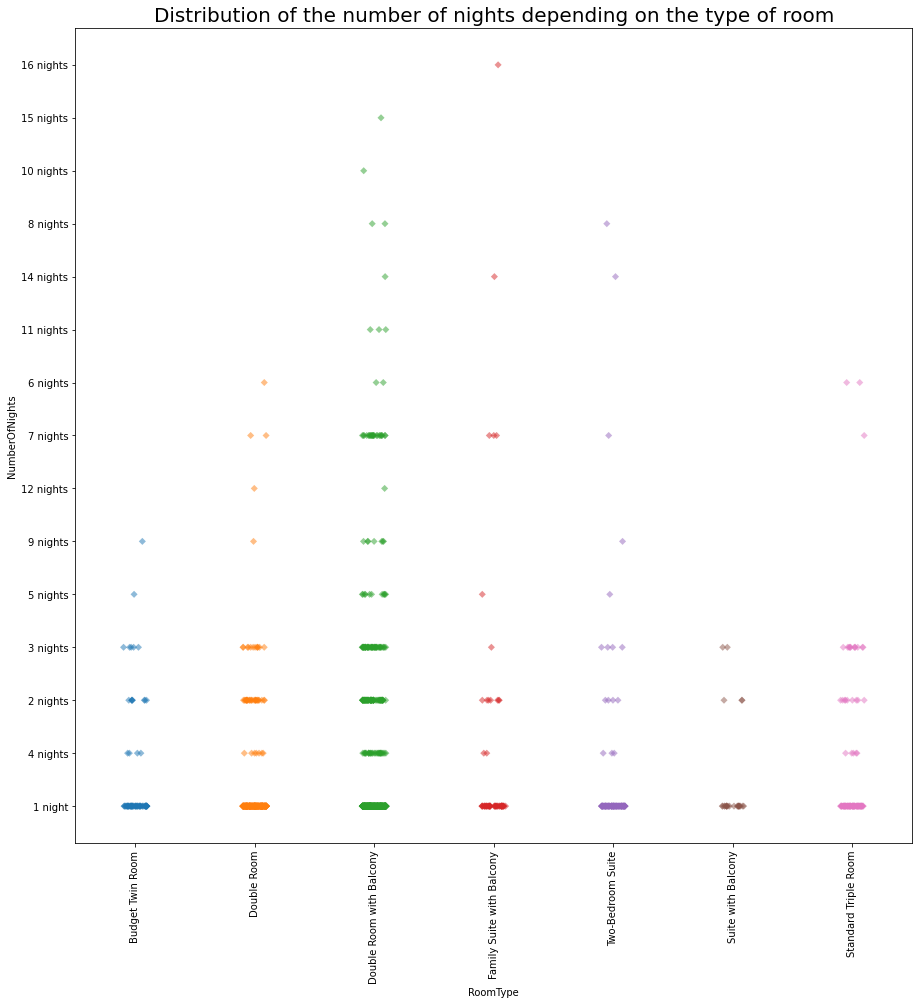

In [110]:
plt.subplots(figsize=(15,15))
plt.xticks(rotation=90)
sns.stripplot(y='NumberOfNights', x='RoomType', data=data, marker='D', alpha=0.5)
plt.title('Distribution of the number of nights depending on the type of room',fontsize = 20)
plt.show()

## Room Types depending on Group Types

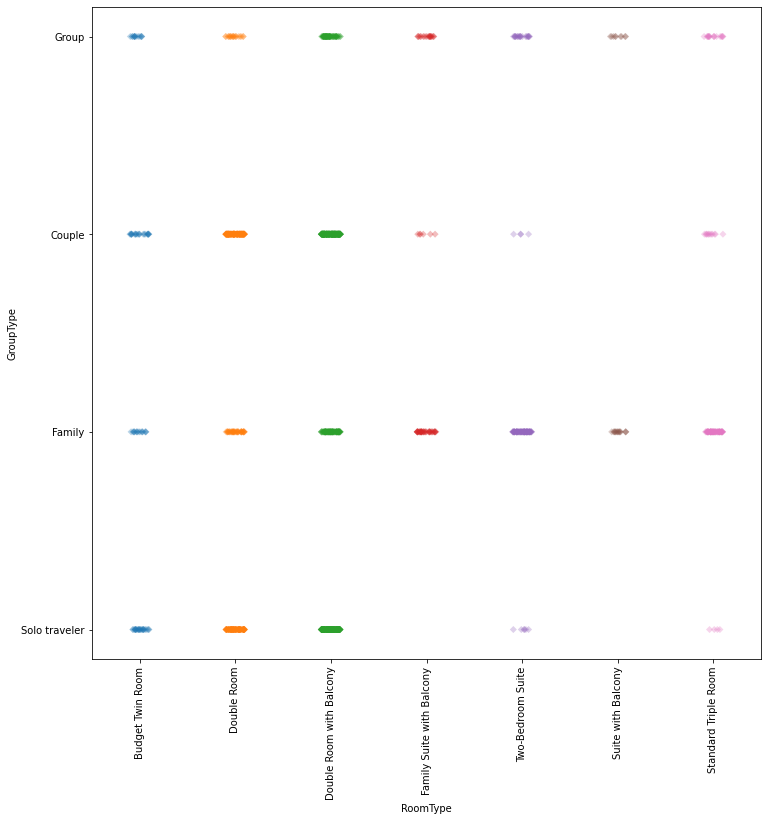

In [111]:
plt.subplots(figsize=(12,12))
plt.xticks(rotation=90)
sns.stripplot(data=data, y='GroupType', x='RoomType',marker='D', alpha=0.3)
plt.show()

## Modelling

In [112]:
data.PositiveReview = data.PositiveReview.fillna('')

In [113]:
data.NegativeReview = data.NegativeReview.fillna('')

In [114]:
data.Length = data.PositiveReview.apply(len)

In [115]:
data.head()

,Title,PositiveReview,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse
0,Wonderful place to stay.,"New, comfortable apartments, close to the airp...",Nothing at all.,10.0,Olga,Norway,Budget Twin Room,1 night,June 2022,Solo traveler,NaN
1,It was superb,We had a really pleasant stay! The staff was v...,,10.0,Iwona,Poland,Double Room,3 nights,December 2022,Family,NaN
2,Very Good,the location is great and near the airport. bu...,,8.0,Ruijia,Sweden,Double Room,1 night,December 2022,Solo traveler,NaN
3,Wonderful,Great stuff\nGreat Quality/price\nClean,,9.0,Theprincem,United Kingdom,Double Room with Balcony,2 nights,September 2022,Solo traveler,NaN
4,"Fantastic value for a new, modern and spotless...","Clean and modern with very comfortable beds, i...",,10.0,M,Switzerland,Family Suite with Balcony,1 night,October 2022,Family,NaN


In [116]:
data.Length2 = data.NegativeReview.apply(len)
data.head()

,Title,PositiveReview,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse
0,Wonderful place to stay.,"New, comfortable apartments, close to the airp...",Nothing at all.,10.0,Olga,Norway,Budget Twin Room,1 night,June 2022,Solo traveler,NaN
1,It was superb,We had a really pleasant stay! The staff was v...,,10.0,Iwona,Poland,Double Room,3 nights,December 2022,Family,NaN
2,Very Good,the location is great and near the airport. bu...,,8.0,Ruijia,Sweden,Double Room,1 night,December 2022,Solo traveler,NaN
3,Wonderful,Great stuff\nGreat Quality/price\nClean,,9.0,Theprincem,United Kingdom,Double Room with Balcony,2 nights,September 2022,Solo traveler,NaN
4,"Fantastic value for a new, modern and spotless...","Clean and modern with very comfortable beds, i...",,10.0,M,Switzerland,Family Suite with Balcony,1 night,October 2022,Family,NaN


## Split the Data

In [117]:
X_train, X_test, y_train, y_test = train_test_split(data['PositiveReview'], data['Score'], test_size=0.2)


In [118]:
tfid = TfidfVectorizer()
train_tfid_matrix = tfid.fit_transform(X_train)
test_tfid_matrix = tfid.transform(X_test)


In [119]:
pickle.dump(tfid, open('tfidf.pkl', 'wb'))

In [120]:
models = [DecisionTreeClassifier(),
          RandomForestClassifier(),
          SVC(),
          LogisticRegression(max_iter=1000),
          KNeighborsClassifier(),
          BernoulliNB()]